In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [7]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [9]:
# 이제 값들이 모두 정리가 되었으니 기계가 쉽게 알아들을 수 있도록 숫자로 변환시켜 주도록 하겠습니다.
train['Title_label'] = train['Title'].astype('category').cat.codes

train[['Title','Title_label']]

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Miss,1
3,Mrs,3
4,Mr,2
...,...,...
886,Other,4
887,Miss,1
888,Miss,1
889,Mr,2


In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,2


In [11]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [12]:
test['Title_label'] = test['Title'].astype('category').cat.codes

test[['Title','Title_label']]

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Mr,2
3,Mr,2
4,Mrs,3
...,...,...
413,Mr,2
414,Other,4
415,Mr,2
416,Mr,2


In [13]:
train.Title

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 891, dtype: object

In [14]:
test.Title

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414     Other
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [16]:
test.groupby('Title')['Age'].mean()

Title
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Other     43.833333
Name: Age, dtype: float64

In [15]:
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
Other     42.384615
Name: Age, dtype: float64

In [15]:
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age']=32
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age']=42

test.loc[(test.Age.isnull())&(test.Title=='Mr'),'Age']=32
test.loc[(test.Age.isnull())&(test.Title=='Mrs'),'Age']=39
test.loc[(test.Age.isnull())&(test.Title=='Master'),'Age']=7
test.loc[(test.Age.isnull())&(test.Title=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Title=='Other'),'Age']=44

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title_label      0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Title_label      0
dtype: int64

In [18]:
# 불필요 데이터 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [19]:
# 불필요 데이터 지우기
train.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

In [20]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,22.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,2


In [21]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,A.5. 3236,8.0500,NaN,S,2
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,4
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2
416,1308,3,male,32.0,0,0,359309,8.0500,NaN,S,2


In [25]:
#train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)
#test["Age"].fillna(test.groupby("Sex")["Age"].transform("median"), inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title_label      0
dtype: int64

In [27]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,A.5. 3236,8.0500,NaN,S,2
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,4
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2
416,1308,3,male,32.0,0,0,359309,8.0500,NaN,S,2


In [23]:
전체데이터 = [train, test]

In [41]:
for 데이터 in 전체데이터:
    데이터.loc[ 데이터['Age'] <= 16, 'Age'] = 0
    데이터.loc[(데이터['Age'] > 16) & (데이터['Age'] <= 26), 'Age'] = 1
    데이터.loc[(데이터['Age'] > 26) & (데이터['Age'] <= 36), 'Age'] = 2
    데이터.loc[(데이터['Age'] > 36) & (데이터['Age'] <= 62), 'Age'] = 3
    데이터.loc[ 데이터['Age'] > 62, 'Age'] = 4

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,7.2500,0
1,2,1,1,1,3.0,1,0,71.2833,1
2,3,1,3,1,1.0,0,0,7.9250,0
3,4,1,1,1,2.0,1,0,53.1000,0
4,5,0,3,0,2.0,0,0,8.0500,0


In [31]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,2
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,2
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,3


In [24]:
for 데이터 in 전체데이터:
    데이터['Fare_bin'] = pd.qcut(train['Fare'], 5)
    데이터['Fare_label'] = 데이터['Fare_bin'].astype('category').cat.codes

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label,Fare_bin,Fare_label
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,"(-0.001, 7.854]",0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3,"(39.688, 512.329]",4
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.854, 10.5]",1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3,"(39.688, 512.329]",4
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.854, 10.5]",1


In [26]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('Fare', axis=1, inplace=True)
    데이터.drop('Fare_bin', axis=1, inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S,2,0
1,2,1,1,female,38.0,1,0,PC 17599,C85,C,3,4
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1,1
3,4,1,1,female,35.0,1,0,113803,C123,S,3,4
4,5,0,3,male,35.0,0,0,373450,NaN,S,2,1


In [28]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [29]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,892,3,male,34.5,0,0,330911,NaN,Q,2,0,1
1,893,3,female,47.0,1,0,363272,NaN,S,3,4,2
2,894,2,male,62.0,0,0,240276,NaN,Q,2,1,1
3,895,3,male,27.0,0,0,315154,NaN,S,2,4,1
4,896,3,female,22.0,1,1,3101298,NaN,S,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,A.5. 3236,NaN,S,2,0,1
414,1306,1,female,39.0,0,0,PC 17758,C105,C,4,1,1
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,NaN,S,2,1,1
416,1308,3,male,32.0,0,0,359309,NaN,S,2,3,1


In [30]:
mapping_data = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for 데이터 in 전체데이터:
    데이터['FamilySize'] = 데이터['FamilySize'].map(mapping_data)

In [31]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,892,3,male,34.5,0,0,330911,NaN,Q,2,0,0.0
1,893,3,female,47.0,1,0,363272,NaN,S,3,4,0.4
2,894,2,male,62.0,0,0,240276,NaN,Q,2,1,0.0
3,895,3,male,27.0,0,0,315154,NaN,S,2,4,0.0
4,896,3,female,22.0,1,1,3101298,NaN,S,3,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,A.5. 3236,NaN,S,2,0,0.0
414,1306,1,female,39.0,0,0,PC 17758,C105,C,4,1,0.0
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,NaN,S,2,1,0.0
416,1308,3,male,32.0,0,0,359309,NaN,S,2,3,0.0


In [32]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S,2,0,0.4
1,2,1,1,female,38.0,1,0,PC 17599,C85,C,3,4,0.4
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1,1,0.0
3,4,1,1,female,35.0,1,0,113803,C123,S,3,4,0.4
4,5,0,3,male,35.0,0,0,373450,NaN,S,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,NaN,S,4,2,0.0
887,888,1,1,female,19.0,0,0,112053,B42,S,1,3,0.0
888,889,0,3,female,22.0,1,2,W./C. 6607,NaN,S,1,3,1.2
889,890,1,1,male,26.0,0,0,111369,C148,C,2,3,0.0


In [33]:
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].fillna('S')

In [34]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S,2,0,0.4
1,2,1,1,female,38.0,1,0,PC 17599,C85,C,3,4,0.4
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1,1,0.0
3,4,1,1,female,35.0,1,0,113803,C123,S,3,4,0.4
4,5,0,3,male,35.0,0,0,373450,NaN,S,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,NaN,S,4,2,0.0
887,888,1,1,female,19.0,0,0,112053,B42,S,1,3,0.0
888,889,0,3,female,22.0,1,2,W./C. 6607,NaN,S,1,3,1.2
889,890,1,1,male,26.0,0,0,111369,C148,C,2,3,0.0


In [35]:
mapping_data = {"S": 0, "C": 1, "Q": 2}
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].map(mapping_data)

In [36]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,0,2,0,0.4
1,2,1,1,female,38.0,1,0,PC 17599,C85,1,3,4,0.4
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,0,1,1,0.0
3,4,1,1,female,35.0,1,0,113803,C123,0,3,4,0.4
4,5,0,3,male,35.0,0,0,373450,NaN,0,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,NaN,0,4,2,0.0
887,888,1,1,female,19.0,0,0,112053,B42,0,1,3,0.0
888,889,0,3,female,22.0,1,2,W./C. 6607,NaN,0,1,3,1.2
889,890,1,1,male,26.0,0,0,111369,C148,1,2,3,0.0


In [37]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,892,3,male,34.5,0,0,330911,NaN,2,2,0,0.0
1,893,3,female,47.0,1,0,363272,NaN,0,3,4,0.4
2,894,2,male,62.0,0,0,240276,NaN,2,2,1,0.0
3,895,3,male,27.0,0,0,315154,NaN,0,2,4,0.0
4,896,3,female,22.0,1,1,3101298,NaN,0,3,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,A.5. 3236,NaN,0,2,0,0.0
414,1306,1,female,39.0,0,0,PC 17758,C105,1,4,1,0.0
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,NaN,0,2,1,0.0
416,1308,3,male,32.0,0,0,359309,NaN,0,2,3,0.0


In [38]:
test['Sex'] = test['Sex'].astype('category').cat.codes
train['Sex'] = train['Sex'].astype('category').cat.codes

In [39]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,892,3,1,34.5,0,0,330911,NaN,2,2,0,0.0
1,893,3,0,47.0,1,0,363272,NaN,0,3,4,0.4
2,894,2,1,62.0,0,0,240276,NaN,2,2,1,0.0
3,895,3,1,27.0,0,0,315154,NaN,0,2,4,0.0
4,896,3,0,22.0,1,1,3101298,NaN,0,3,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,32.0,0,0,A.5. 3236,NaN,0,2,0,0.0
414,1306,1,0,39.0,0,0,PC 17758,C105,1,4,1,0.0
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,NaN,0,2,1,0.0
416,1308,3,1,32.0,0,0,359309,NaN,0,2,3,0.0


In [40]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,1,22.0,1,0,A/5 21171,NaN,0,2,0,0.4
1,2,1,1,0,38.0,1,0,PC 17599,C85,1,3,4,0.4
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,NaN,0,1,1,0.0
3,4,1,1,0,35.0,1,0,113803,C123,0,3,4,0.4
4,5,0,3,1,35.0,0,0,373450,NaN,0,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,NaN,0,4,2,0.0
887,888,1,1,0,19.0,0,0,112053,B42,0,1,3,0.0
888,889,0,3,0,22.0,1,2,W./C. 6607,NaN,0,1,3,1.2
889,890,1,1,1,26.0,0,0,111369,C148,1,2,3,0.0


In [4]:
from sklearn import preprocessing

def cleanData(data):

    # Data missing and categorical to drop
    data.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

    # Data missing Case2
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

    # FARE Data missing in test
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

    # Data missing Case3
    data.dropna(axis=0, subset=['Embarked'], inplace=True)

    # Categorical Data
    le = preprocessing.LabelEncoder()

    # Sex
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)

    # Embarked
    data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)

    return data

clean_train = cleanData(train)
clean_test = cleanData(test)

In [5]:
clean_train = cleanData(train)
clean_test = cleanData(test)

In [57]:
clean_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,7.2500,0
1,2,1,1,1,3.0,1,0,71.2833,1
2,3,1,3,1,1.0,0,0,7.9250,0
3,4,1,1,1,2.0,1,0,53.1000,0
4,5,0,3,0,2.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,13.0000,0
887,888,1,1,1,1.0,0,0,30.0000,0
888,889,0,3,1,1.0,1,2,23.4500,0
889,890,1,1,0,1.0,0,0,30.0000,1


In [41]:
for 데이터 in 전체데이터:
    데이터.drop('Ticket', axis=1, inplace=True)
    데이터.drop('Cabin', axis=1, inplace=True)
    데이터.drop('PassengerId', axis=1, inplace=True)

In [76]:
for 데이터 in 전체데이터:
    데이터.drop('Embarked', axis=1, inplace=True)

In [77]:
test

,Pclass,Sex,Age,Title_label,Fare_label,FamilySize
0,3,1,34.5,2,0,0.0
1,3,0,47.0,3,4,0.4
2,2,1,62.0,2,1,0.0
3,3,1,27.0,2,4,0.0
4,3,0,22.0,3,1,0.8
...,...,...,...,...,...,...
413,3,1,32.0,2,0,0.0
414,1,0,39.0,4,1,0.0
415,3,1,38.5,2,1,0.0
416,3,1,32.0,2,3,0.0


In [48]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title_label,Fare_label,FamilySize
0,0,3,1,22.0,1,0,0,2,0,0.4
1,1,1,0,38.0,1,0,1,3,4,0.4
2,1,3,0,26.0,0,0,0,1,1,0.0
3,1,1,0,35.0,1,0,0,3,4,0.4
4,0,3,1,35.0,0,0,0,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0,4,2,0.0
887,1,1,0,19.0,0,0,0,1,3,0.0
888,0,3,0,22.0,1,2,0,1,3,1.2
889,1,1,1,26.0,0,0,1,2,3,0.0


In [43]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title_label,Fare_label,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.086731,-0.035322,0.081629,0.106811,-0.052471,0.317783,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.344699,0.083081,0.018443,0.045702,-0.195910,-0.705206,0.065997
Sex,-0.543351,0.131900,1.000000,0.113740,-0.114631,-0.245489,-0.116569,0.040484,-0.244943,-0.200988
Age,-0.086731,-0.344699,0.113740,1.000000,-0.266514,-0.195463,-0.017120,0.520421,0.108837,-0.279803
SibSp,-0.035322,0.083081,-0.114631,-0.266514,1.000000,0.414838,-0.059961,-0.213887,0.354974,0.890712
Parch,0.081629,0.018443,-0.245489,-0.195463,0.414838,1.000000,-0.078665,-0.122792,0.351317,0.783111
Embarked,0.106811,0.045702,-0.116569,-0.017120,-0.059961,-0.078665,1.000000,-0.081928,-0.089125,-0.080281
Title_label,-0.052471,-0.195910,0.040484,0.520421,-0.213887,-0.122792,-0.081928,1.000000,0.060707,-0.207530
Fare_label,0.317783,-0.705206,-0.244943,0.108837,0.354974,0.351317,-0.089125,0.060707,1.000000,0.418125
FamilySize,0.016639,0.065997,-0.200988,-0.279803,0.890712,0.783111,-0.080281,-0.207530,0.418125,1.000000


<Axes: >

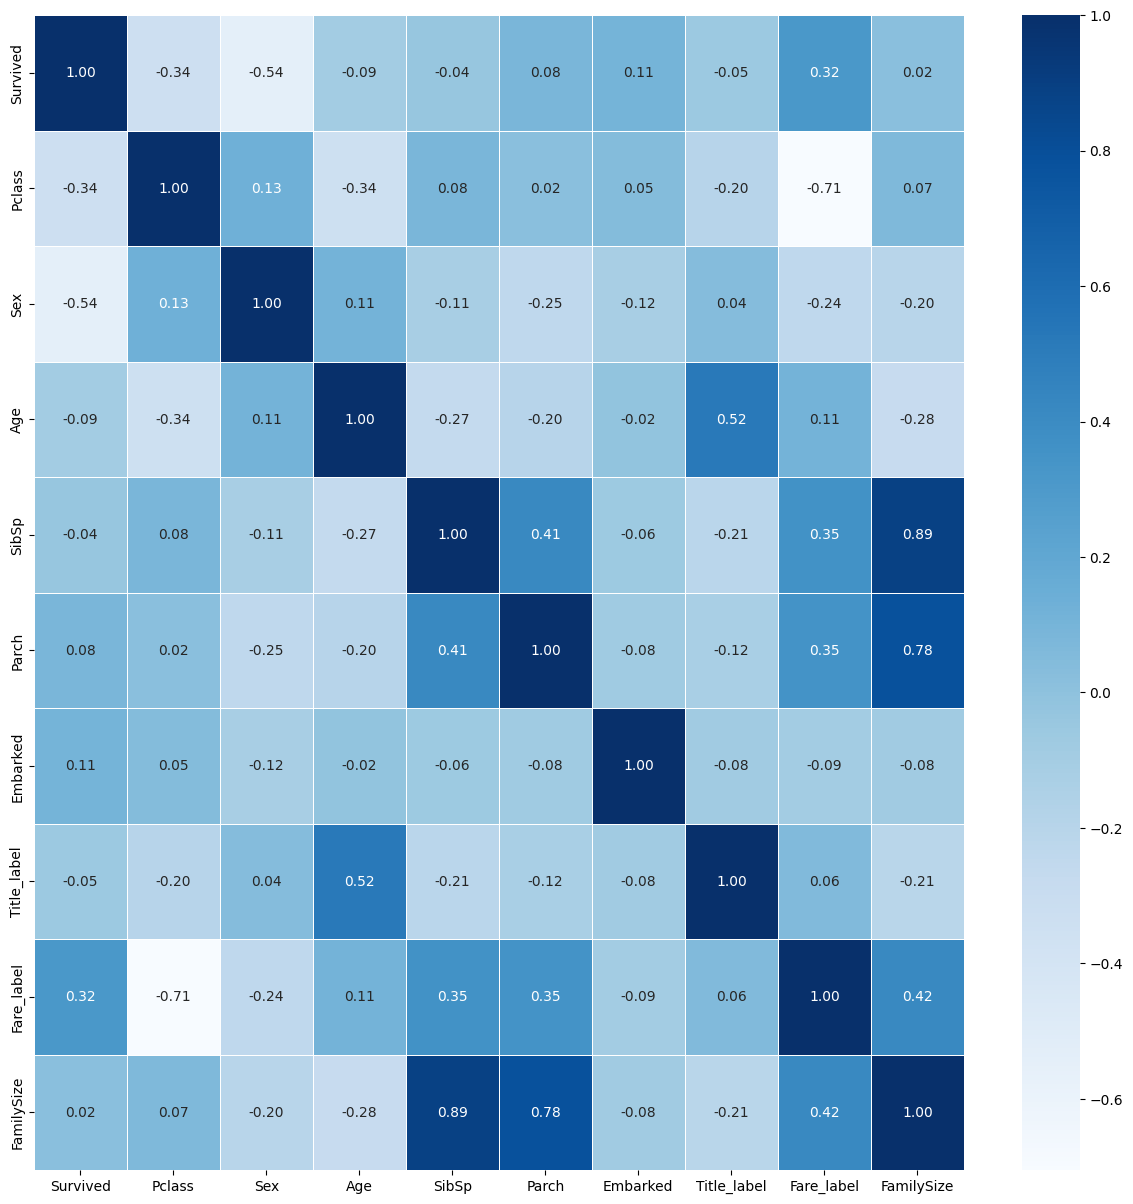

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [58]:
clean_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,7.2500,0
1,2,1,1,1,3.0,1,0,71.2833,1
2,3,1,3,1,1.0,0,0,7.9250,0
3,4,1,1,1,2.0,1,0,53.1000,0
4,5,0,3,0,2.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,13.0000,0
887,888,1,1,1,1.0,0,0,30.0000,0
888,889,0,3,1,1.0,1,2,23.4500,0
889,890,1,1,0,1.0,0,0,30.0000,1


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
clf = KNeighborsClassifier(n_neighbors = 15, weights="distance", metric="euclidean")
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [79]:
# kNN 점수 확인
round(np.mean(score)*100, 2)

76.32

In [80]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [81]:
# decision tree 점수 확인
round(np.mean(score)*100, 2)

79.57

In [82]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [83]:
# Random Forest 점수 확인
round(np.mean(score)*100, 2)

81.26

In [84]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [85]:
# Random Forest 점수 확인
round(np.mean(score)*100, 2)

80.93

In [86]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [87]:
# Naive Bayes 점수 확인
round(np.mean(score)*100, 2)

78.56

In [88]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [89]:
round(np.mean(score)*100,2)

67.91

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
clf = GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [70]:
round(np.mean(score)*100,2)

83.61

In [73]:
clf = GradientBoostingClassifier()
clf.fit(train_data, target)
#test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test)

In [74]:
test_ori = pd.read_csv('/content/test.csv')

In [75]:
제출값 = pd.DataFrame({"PassengerId": test_ori["PassengerId"],"Survived": prediction})
제출값.to_csv('titanic_ver9.csv', index=False)

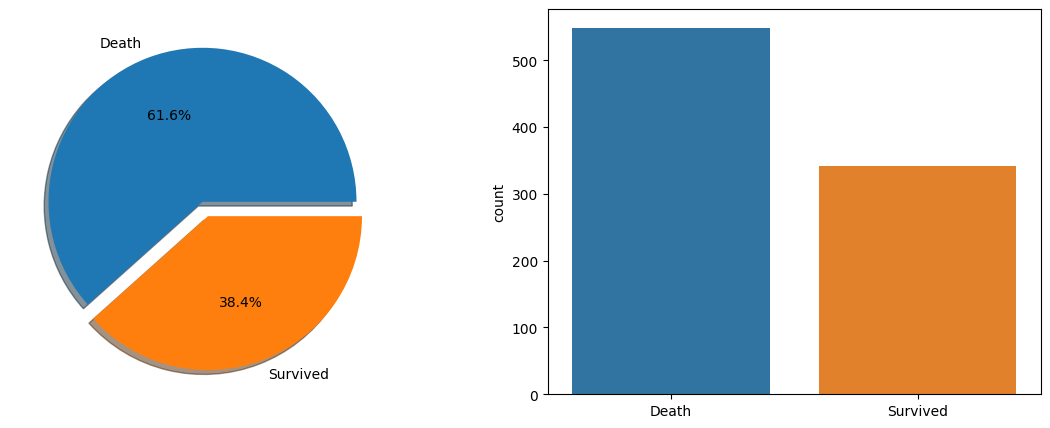

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['Death', 'Survived']

# Pie Plot
train['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0,0.1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')

# Count Plot
sns.countplot(data=train, x='Survived', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)

plt.show()

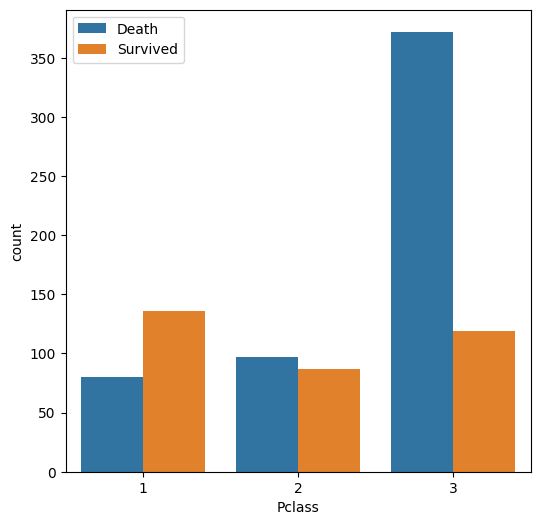

In [80]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax)

#범례 한글로 변경
labels=['Death', 'Survived']
ax.legend(labels=labels)

plt.show()

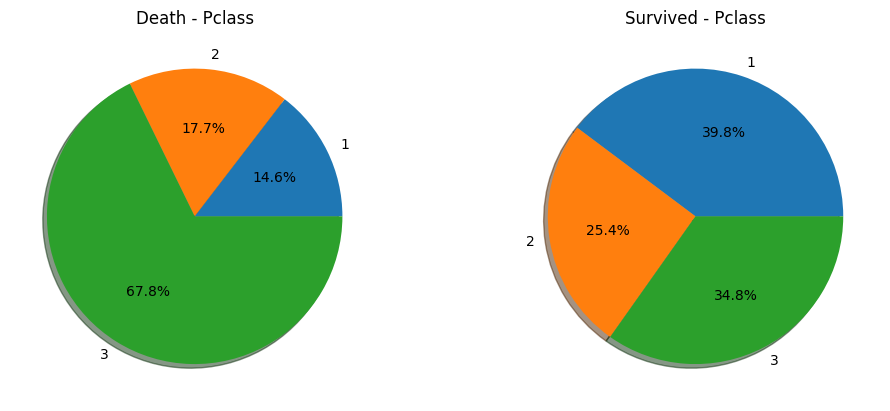

In [81]:
fig, ax = plt.subplots(1,2,figsize=(10,4), constrained_layout=True)


#Survived 가 0인 데이터를 이용한 Pie Plot
train[train['Survived'] == 0]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set(ylabel='', title='Death - Pclass')

#Survived 가 1인 데이터를 이용한 Pie Plot
train[train['Survived'] == 1]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%')
ax[1].set(ylabel='', title='Survived - Pclass')

plt.show()

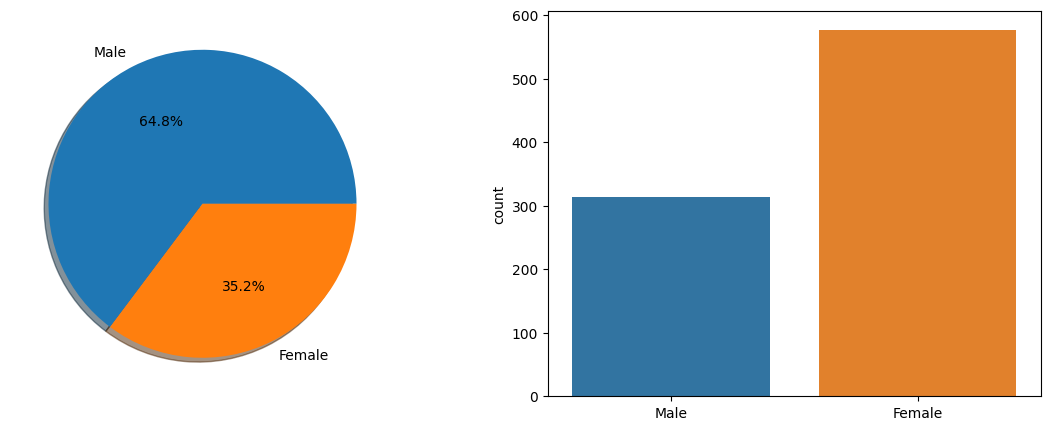

In [82]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
labels = ['Male', 'Female']

# Pie Plot
train['Sex'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')

# Count Plot
sns.countplot(data=train, x='Sex', ax=ax[1])
ax[1].set(xticklabels=labels, xlabel='')

plt.show()

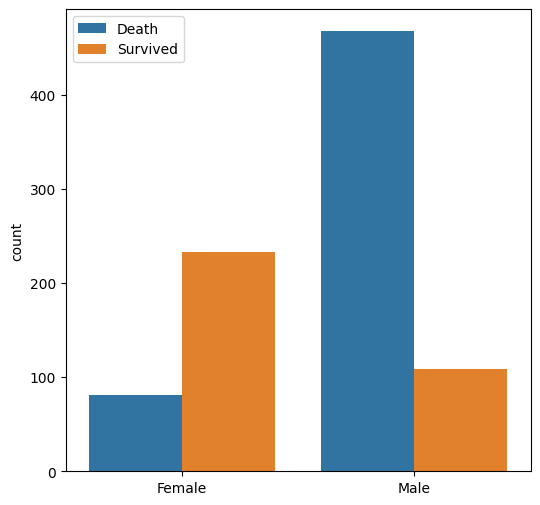

In [90]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train, x='Sex', hue='Survived', ax=ax)

ax.set(xticklabels=['Female', 'Male'], xlabel='')

#범례 한글로 변경
labels=['Death', 'Survived']
ax.legend(labels=labels)

plt.show()

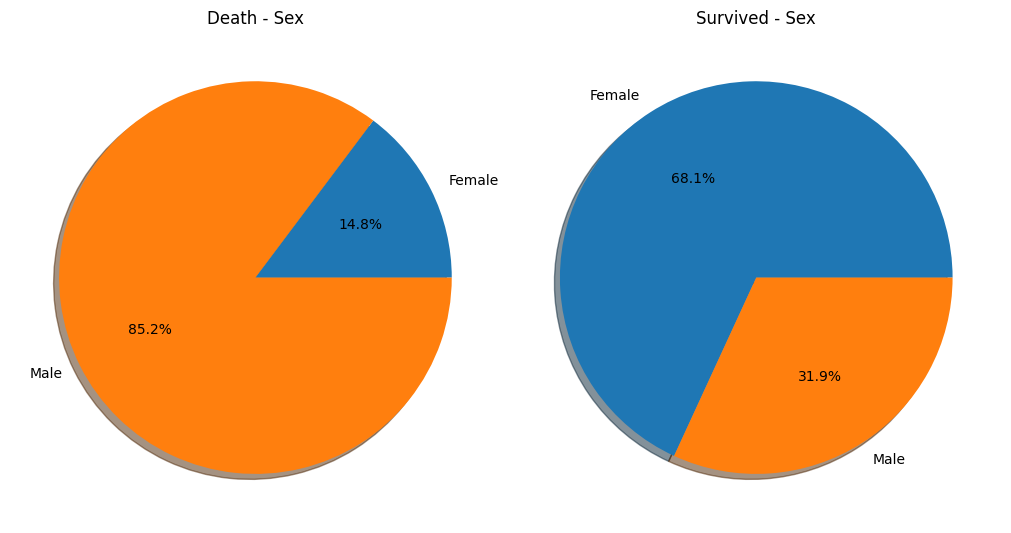

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,6), constrained_layout=True)
labels = ['Female', 'Male']

#Survived 가 0인 데이터를 이용한 Pie Plot
train[train['Survived'] == 0]['Sex'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='Death - Sex')

#Survived 가 1인 데이터를 이용한 Pie Plot
train[train['Survived'] == 1]['Sex'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[1].set(ylabel='', title='Survived - Sex')

plt.show()

<ipython-input-87-41cdf799381f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], bins=25, ax=ax)


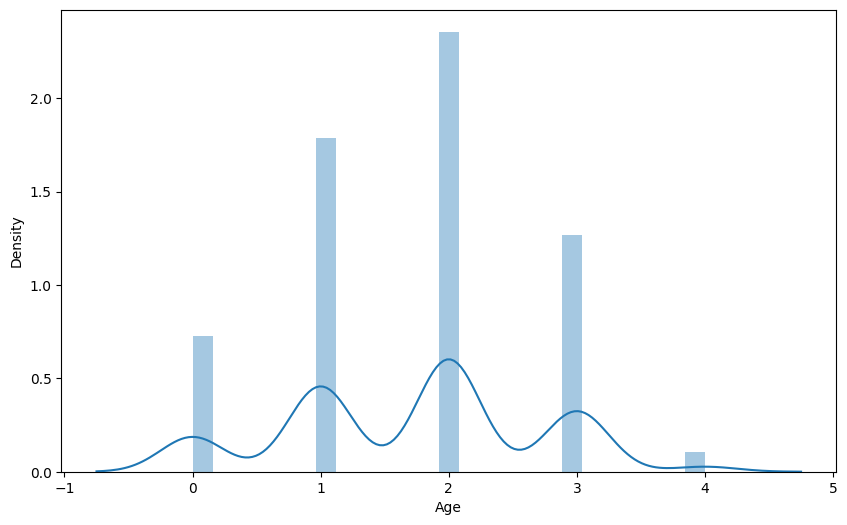

In [87]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(train['Age'], bins=25, ax=ax)

plt.show()

<ipython-input-89-26dbe433271e>:6: RuntimeWarning: invalid value encountered in long_scalars
  age_range_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))


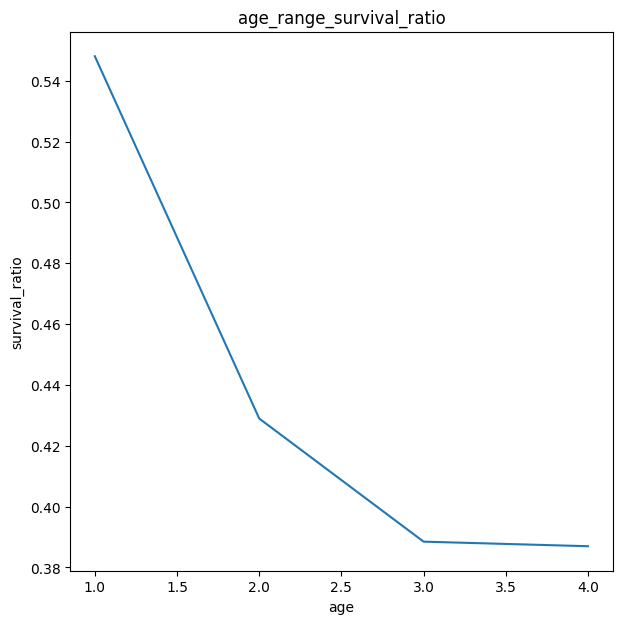

In [89]:
# 생존율을 입력받을 List 생성
age_range_survival_ratio = []

# 1살 부터 생존율 구하기
for i in range(0,5):
    age_range_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(age_range_survival_ratio)
plt.title('age_range_survival_ratio')
plt.ylabel('survival_ratio')
plt.xlabel('age')

plt.show()